In [57]:
### 1.3. Un prototipo: enteros en progresiones aritméticas

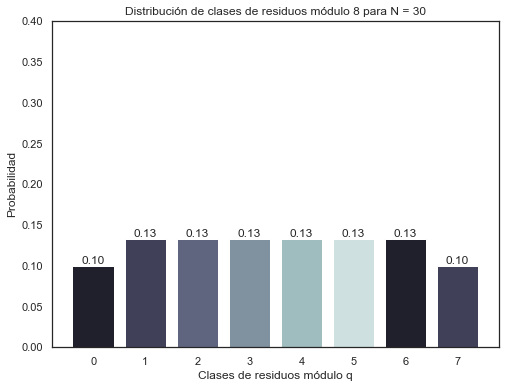

Chi-cuadrado: 0.4000, p-valor: 0.9997


In [55]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, ks_1samp

# Calcula el residuo de un número.
def reducc_mod_q(n, q):
    return n % q

# Simula la distribución de residuos módulo q
def simulate_distribution(N, q):
    omega_N = np.arange(1, N+1)  # Genera los números del 1 al N
    X_N = np.array([reducc_mod_q(n, q) for n in omega_N])  # Array que guarda la reducción del módulo q a cada número.
    counts = np.bincount(X_N, minlength=q)  # Cuenta el número de ocurrencias de cada valor en el array.
    probabilities = counts / N  # Regla de Laplace
    return probabilities, counts

# Prueba de bondad de ajuste Chi-cuadrado
def chi_squared_test(counts, N, q):
    expected_counts = np.full(q, N / q)  # Esperanza de distribución uniforme
    chi_stat, p_value = chisquare(counts, expected_counts)
    print(f"Chi-cuadrado: {chi_stat:.4f}, p-valor: {p_value:.4f}")


# Histograma de la distribución
def histograma(N, q):
    sns.set_theme(style="white")
    palette = sns.color_palette(palette='bone')
    
    probabilities, counts = simulate_distribution(N, q)  # Obtiene la distribución de los residuos
    
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    bars = plt.bar(range(q), probabilities, color=palette)
    
    plt.title(f'Distribución de clases de residuos módulo {q} para N = {N}')
    plt.xlabel('Clases de residuos módulo q')
    plt.ylabel('Probabilidad')
    plt.ylim(0, 0.4)  # Ajusta los límites del eje de la y.
    
    # Añade valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')
    
    plt.show()
    
    # Realiza las pruebas de bondad de ajuste
    chi_squared_test(counts, N, q)

# Parámetros
q = 8
N = 30  # Valor fijo de N

# Gráfica
histograma(N, q)

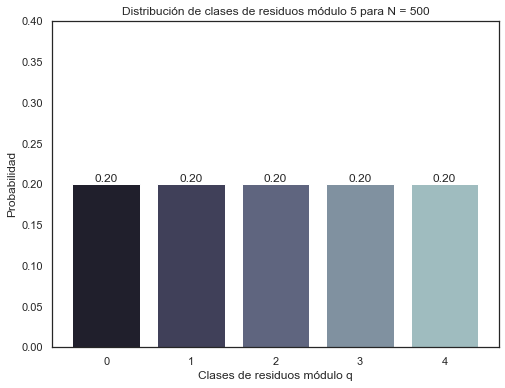

Chi-cuadrado: 0.0000, p-valor: 1.0000
Kolmogorov-Smirnov: 19.0020, p-valor: 0.0000


In [50]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, ks_1samp

# Calcula el residuo de un número.
def reducc_mod_q(n, q):
    return n % q

# Simula la distribución de residuos módulo q
def simulate_distribution(N, q):
    omega_N = np.arange(1, N+1)  # Genera los números del 1 al N
    X_N = np.array([reducc_mod_q(n, q) for n in omega_N])  # Array que guarda la reducción del módulo q a cada número.
    counts = np.bincount(X_N, minlength=q)  # Cuenta el número de ocurrencias de cada valor en el array.
    probabilities = counts / N  # Regla de Laplace
    return probabilities, counts

# Prueba de bondad de ajuste Chi-cuadrado
def chi_squared_test(counts, N, q):
    expected_counts = np.full(q, N / q)  # Esperanza de distribución uniforme
    chi_stat, p_value = chisquare(counts, expected_counts)
    print(f"Chi-cuadrado: {chi_stat:.4f}, p-valor: {p_value:.4f}")

# Prueba de Kolmogorov-Smirnov
def kolmogorov_smirnov_test(X_N, q):
    uniform_cdf = lambda x: x / q
    ks_stat, p_value = ks_1samp(X_N / q, uniform_cdf)
    print(f"Kolmogorov-Smirnov: {ks_stat:.4f}, p-valor: {p_value:.4f}")

# Histograma de la distribución
def histograma(N, q):
    sns.set_theme(style="white")
    palette = sns.color_palette(palette='bone')
    
    probabilities, counts = simulate_distribution(N, q)  # Obtiene la distribución de los residuos
    
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    bars = plt.bar(range(q), probabilities, color=palette)
    
    plt.title(f'Distribución de clases de residuos módulo {q} para N = {N}')
    plt.xlabel('Clases de residuos módulo q')
    plt.ylabel('Probabilidad')
    plt.ylim(0, 0.4)  # Ajusta los límites del eje de la y.
    
    # Añade valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')
    
    plt.show()
    
    # Realiza las pruebas de bondad de ajuste
    chi_squared_test(counts, N, q)
    kolmogorov_smirnov_test(np.arange(1, N+1), q)

# Parámetros
q = 5
N = 500  # Valor fijo de N

# Gráfica
histograma(N, q)


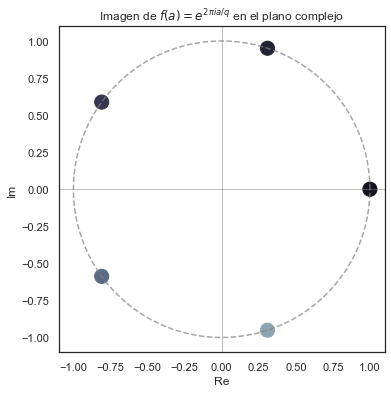

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los colores extraídos de la imagen
colors = ["#141420", "#232336", "#35354D", "#5A6B83", "#8FA5B3"]  # Aproximados

# Definir la función f(a) = e^(2πia/q)
def f(a, q):
    return np.exp(2j * np.pi * a / q)

# Parámetros
q = len(colors)  # Tomamos q igual al número de colores disponibles
a_values = np.arange(q)  # Valores en Z/qZ

# Evaluar la función en el plano complejo
f_values = f(a_values, q)

# Crear la gráfica en el plano complejo
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(f_values.real, f_values.imag, c=colors, s=200)  # Puntos en el círculo unitario

# Dibujar el círculo unitario
theta = np.linspace(0, 2*np.pi, 300)
ax.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='gray', alpha=0.7)

# Configuración del gráfico
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_title(r"Imagen de $f(a) = e^{2\pi i a/q}$ en el plano complejo")
ax.set_aspect("equal")
ax.grid(True, linestyle='--', alpha=0.5)
ax.grid(False)

fig.savefig("grafico.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la gráfica
plt.show()







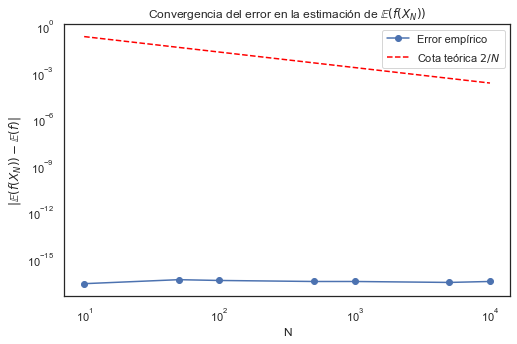

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
q = 5  # Modulo q
N_values = [10, 50, 100, 500, 1000, 5000, 10000]  # Diferentes valores de N

# Definir una función f en Z/qZ -> C (por ejemplo, f(a) = exp(2*pi*i*a/q))
def f(a, q):
    return np.exp(2j * np.pi * a / q)  # Función exponencial compleja

# Calcular la expectativa teórica bajo la medida uniforme
expected_f = np.mean([f(a, q) for a in range(q)])

# Almacenar los errores
errors = []

for N in N_values:
    # Generar la secuencia {1, ..., N}
    numbers = np.arange(1, N + 1)

    # Aplicar reducción módulo q
    residues = numbers % q

    # Calcular la expectativa empírica E(f(X_N))
    empirical_expectation = np.mean([f(a, q) for a in residues])

    # Calcular el error absoluto
    error = np.abs(empirical_expectation - expected_f)
    errors.append(error)

# Graficar la convergencia del error
plt.figure(figsize=(8, 5))
plt.plot(N_values, errors, marker='o', linestyle='-', label='Error empírico')
plt.plot(N_values, 2/np.array(N_values), linestyle='dashed', color='red', label='Cota teórica $2/N$')

# Configuración del gráfico
plt.xlabel('N')
plt.ylabel(r'$|\mathbb{E}(f(X_N)) - \mathbb{E}(f)|$')
plt.xscale('log')
plt.yscale('log')
plt.title('Convergencia del error en la estimación de $\mathbb{E}(f(X_N))$')
plt.legend()
plt.grid(False)
plt




  .savefig("conver2.png", dpi=300, bbox_inches='tight', transparent=False)

# Mostrar el gráfico
plt.show()